### Setting the environment

In [ ]:
#!pip install git+https://github.com/neurallatents/nlb_tools.git

In [ ]:
!git clone https://github.com/bilalhsp/VAE.git

In [ ]:
%cd /content/VAE

In [ ]:
import torch
import numpy as np 
#import torch.nn as nn
#import torch.optim as optim
#from torchvision import datasets, transforms
import matplotlib.pylab as plt
import dataset
import model
#import pickle
import trainers
#import cv2
import os
import yaml
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.cuda.empty_cache()

In [2]:
data_dir = './data'
celeb_data = dataset.CelebA(data_dir, download=True, split='test')

In [ ]:
with open('./config.yaml', 'r') as f:
    manifest = yaml.load(f)#, Loader=yaml.FullLoader)

hyper_param = manifest['hyper_param']

In [4]:
vae = model.CAE()
results_dir = './pretrained'
trainer = trainers.VAE_trainer(vae,results_dir,hyper_param)
trainer.load_checkpoint()

Trainer object created with model: CAE


80

### Loading Images from the Dataset

/tmp/ipykernel_118102/2379086940.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, batch/2, i+1, xticks=[], yticks=[])


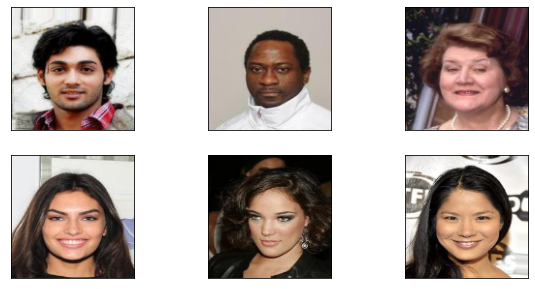

In [5]:
batch = 6
loader = celeb_data.load_data(batch_size=batch, shuffle=True)
data,_ = next(iter(loader))
# inp = data.detach().cpu()
fig = plt.figure(figsize=(10,5))
for i in range(batch):
    ax = fig.add_subplot(2, batch/2, i+1, xticks=[], yticks=[])
    ax.imshow(torch.transpose(torch.transpose(data[i],0,2),0,1))

### Reconstruction using VAE

/tmp/ipykernel_118102/1997941928.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, batch/2, i+1, xticks=[], yticks=[])


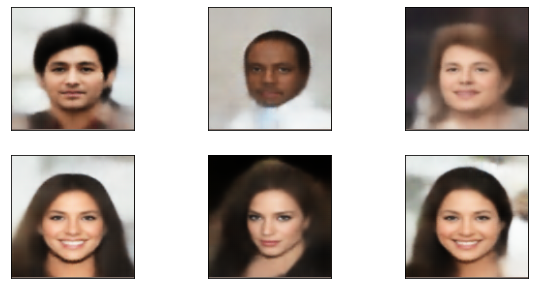

In [6]:
data = data.to(device)
output,_,_ = trainer.model(data)
output = output.detach().cpu()
fig = plt.figure(figsize=(10,5))
for i in range(batch):
    ax = fig.add_subplot(2, batch/2, i+1, xticks=[], yticks=[])
    ax.imshow(torch.transpose(torch.transpose(output[i],0,2),0,1))

### Generating synthetic images
'model.generate()' samples 'mu' and 'log_var' from normal distribution and model decodes this into images. 

/tmp/ipykernel_118102/2719477741.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, batch/2, i+1, xticks=[], yticks=[])


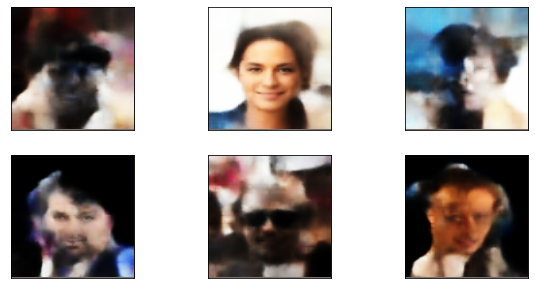

In [7]:
synthetic = trainer.model.generate()
synthetic = synthetic.detach().cpu()
fig = plt.figure(figsize=(10,5))
for i in range(batch):
    ax = fig.add_subplot(2, batch/2, i+1, xticks=[], yticks=[])
    ax.imshow(torch.transpose(torch.transpose(synthetic[i],0,2),0,1))
